In [63]:
from utils.data_cleaning_plots import *
from utils.data_cleaning_helpers import *
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

Definition of all the input and output paths

In [64]:
current_dir =os.getcwd()

# Path to the excel file containing the three replicates of the localization datasets
file_path = os.path.join(current_dir, 'datasets/S1_protein_location.xlsx')

# Names of the sheets to read from the localization datasets
sheet_names = ["PL - All Data Replicate 1", "PL - All Data Replicate 2", "PL - All Data Replicate 3"]

# Path to the fasta file containing the proteins and their sequences
proteins_path = os.path.join(current_dir,'datasets/orf_trans_all.fasta')

# Path to the excel file containing the concentrations datasets 
file_path_concentrations = os.path.join(current_dir, 'datasets/S3_protein_level.xlsx')

# Names of the sheets to read from the concentration datasets
sheet_names_concentration = ["TL - Data", "TE - Data"]

# Output path to store the dataset containing the yORFs and the sequences
output_sequences_path = os.path.join(current_dir, 'datasets_copy/yORF_sequences.csv')

# Output path to store the dataset containing the yORFs and the static localizations
output_static_path = os.path.join(current_dir, 'datasets_copy/yORF_localizations.csv')

# Output path to store the dataset containing the yORFs and the dynamic localizations
output_dynamic_path = os.path.join(current_dir, 'datasets_copy/dynamic_localizations.csv')

# Output path to store the dataset containing the interaction matrix to process
output_interaction_matrix = os.path.join(current_dir, 'datasets_copy/Interaction_matrix.csv')

# Path to the file containing the yORFs and the embeddings for all the sequences 
embeddings_path = os.path.join(current_dir, 'datasets/yORF_embeddings_640.csv')

# Path to the file containing the yORFs and the embeddings for the first and last 20 amino acids of the sequences 
ext_embeddings_path = os.path.join(current_dir, 'datasets/yORF_extrem_embeddings_640.csv')

# Output path to store the dataset containing the sequences of the first and last 20 amino acids
ext_sequences_path = os.path.join(current_dir, 'datasets_copy/yORF_extrem_sequences.csv')

# Output path to store the datasets containing the concetrations
output_concentrationTE = os.path.join(current_dir, 'datasets_copy/TE_levels.csv')
output_concentrationTL = os.path.join(current_dir,'datasets_copy/TL_levels.csv')

# Path to the file containing the interaction data
interaction_matrix_path = os.path.join(current_dir,'datasets/The_Yeast_Interactome_Edges.csv')

# Output path to the final interaction matrices
interaction_matrix_with_TE = os.path.join(current_dir,'datasets_copy/interaction_matrix_TE.csv')
interaction_matrix_with_TL = os.path.join(current_dir,'datasets_copy/interaction_matrix_TL.csv')
interaction_matrix_without_concentrations = os.path.join(current_dir,'datasets_copy/interaction_matrix_without_concentrations.csv')

# Output path for the final dynamic datasets
final_dataset_dyn_with_TE =  os.path.join(current_dir,'datasets_copy/final_dataset_dyn_with_te.csv')
final_dataset_dyn_with_TL =  os.path.join(current_dir,'datasets_copy/final_dataset_dyn_with_tl.csv')
final_dataset_dyn =  os.path.join(current_dir,'datasets_copy/final_dataset_dyn.csv')

Initialize the folder in which save the output datasets

In [65]:
output_folder = "datasets_copy"
os.makedirs(output_folder, exist_ok=True)

Generate all the datasets necessary for our static and dynamic models using the functions implemented in utils/data_cleaning_helpers.py

In [66]:
# Dynamic and static dataset creation
final_df_with_long, dynamic_dataset, static_dataset = datasets_creation(file_path, sheet_names, proteins_path, output_sequences_path, output_static_path, output_dynamic_path)

# Create the dataset with the concentrations of protein
protein_levels_cleaning(file_path_concentrations, sheet_names_concentration, output_concentrationTE, output_concentrationTL)

# Create the interaction matrix
interaction_mat = interaction_matrix(interaction_matrix_path, static_dataset, output_interaction_matrix, delimiter=';')

# Create the dataset containing the informations about the interactions : AT FIRST CONSIDERING TE concentration level
create_correlation_scores(output_interaction_matrix, output_dynamic_path, output_concentrationTE, interaction_matrix_with_TE, top_n=10, n_classes=15, null_row='zeros')

# Create the dataset containing the informations about the interactions : CONSIDERING TL concentration level
create_correlation_scores(output_interaction_matrix, output_dynamic_path, output_concentrationTL, interaction_matrix_with_TL, top_n=10, n_classes=15, null_row='zeros')

# Create the dataset containing the informations about the interactions : WITHOUT CONCENTRATIONS DATA
create_correlation_scores(output_interaction_matrix, output_dynamic_path, False, interaction_matrix_without_concentrations, top_n=10, n_classes=15, null_row='zeros')

# Create the dataset with the extremities
create_extrem_sequences(output_sequences_path, ext_sequences_path, num = 20)

# Create the final dynamic dataset
fin_data_dyn_with_TE = final_dynamic_dataset(output_dynamic_path, embeddings_path, ext_sequences_path, output_concentrationTE, output_concentrationTL, output_static_path, interaction_matrix_with_TE, final_dataset_dyn_with_TE)
fin_data_dyn_with_TL = final_dynamic_dataset(output_dynamic_path, embeddings_path, ext_sequences_path, output_concentrationTE, output_concentrationTL, output_static_path, interaction_matrix_with_TL, final_dataset_dyn_with_TL)
fin_data_dyn = final_dynamic_dataset(output_dynamic_path, embeddings_path, ext_sequences_path, output_concentrationTE, output_concentrationTL, output_static_path, interaction_matrix_without_concentrations, final_dataset_dyn)

**Generation of the plots**

Pie chart with the overall percentage of dynamic and static proteins

<function matplotlib.pyplot.show(close=None, block=None)>

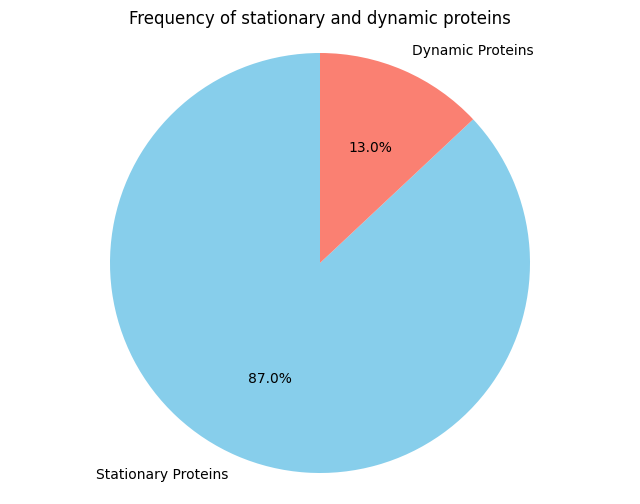

In [67]:
plot_stationary_proteins(dynamic_dataset)
plt.show

Pie chart with the percentage of dynamic and static proteins for each phase

<function matplotlib.pyplot.show(close=None, block=None)>

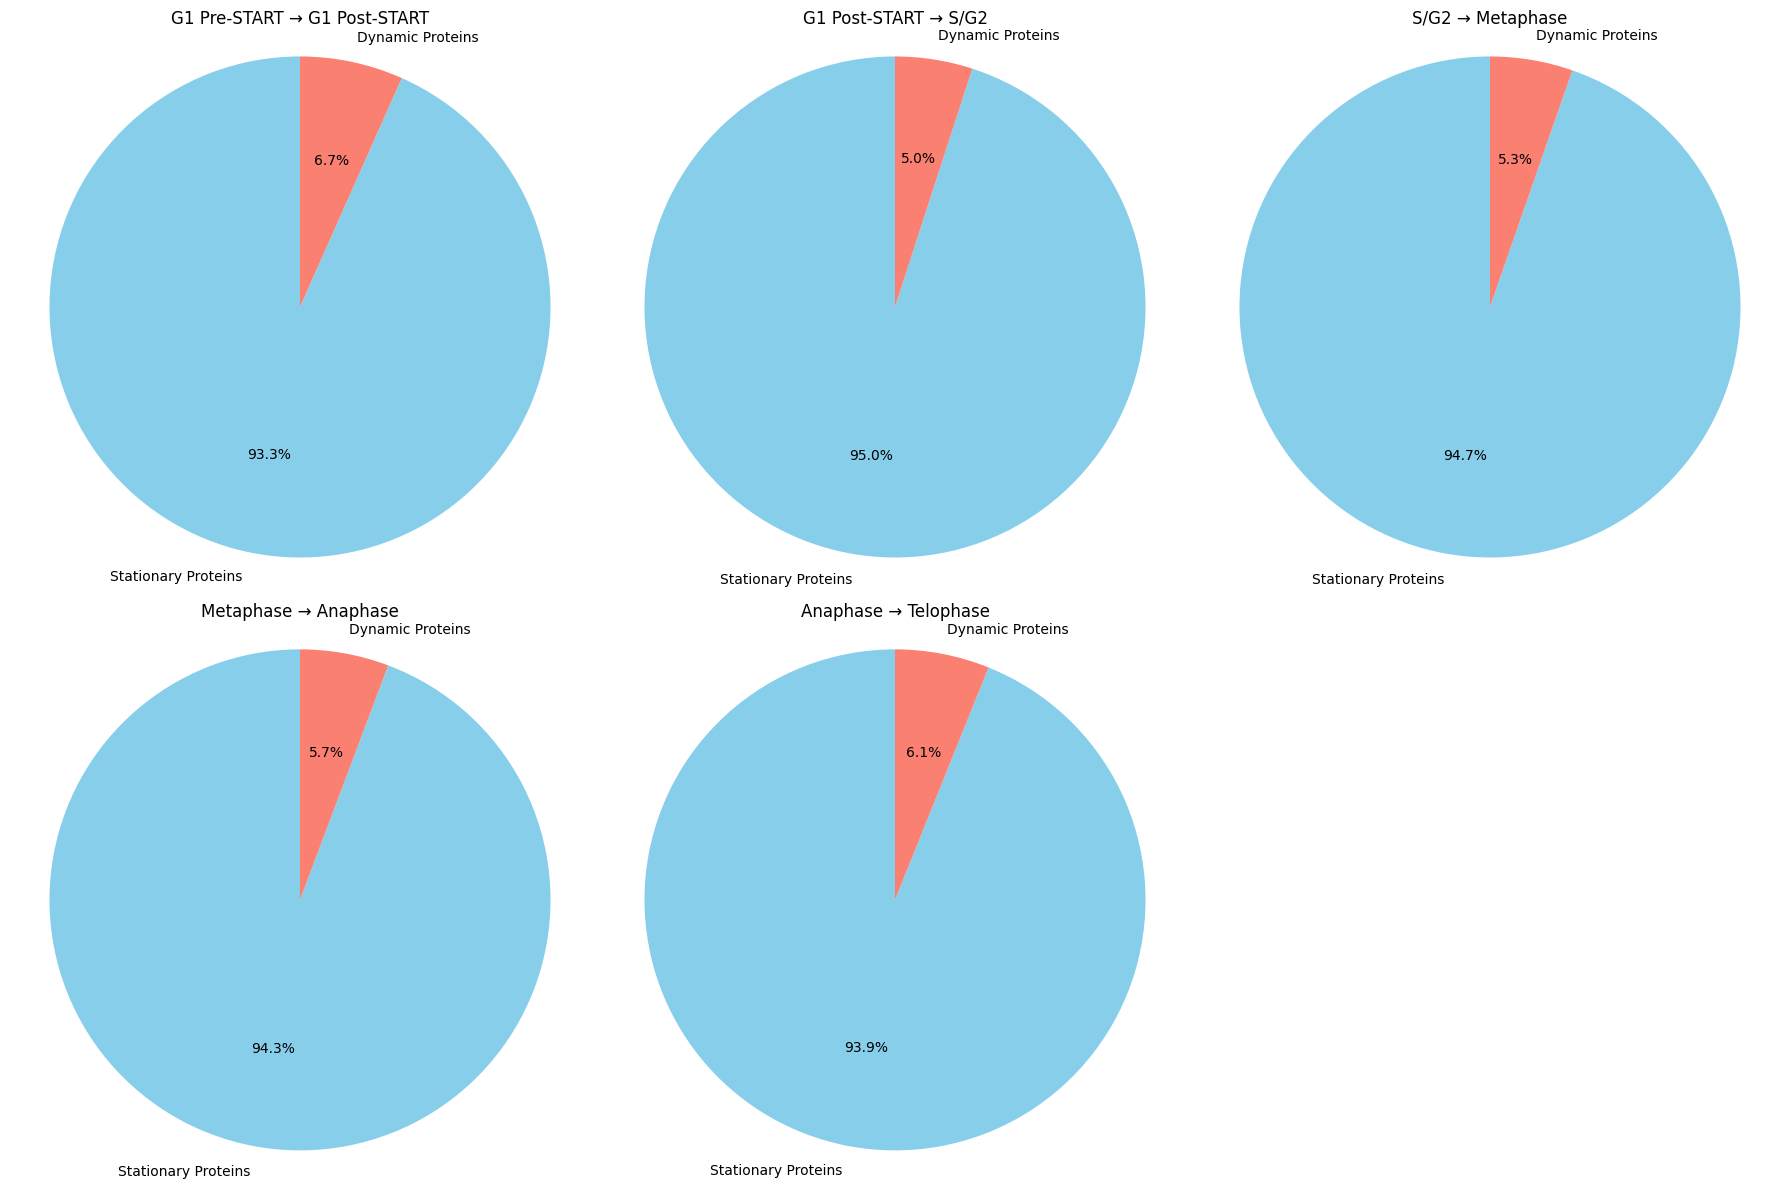

In [68]:
plot_stationary_proteins_per_phase(dynamic_dataset)  
plt.show

Transition matrix

<function matplotlib.pyplot.show(close=None, block=None)>

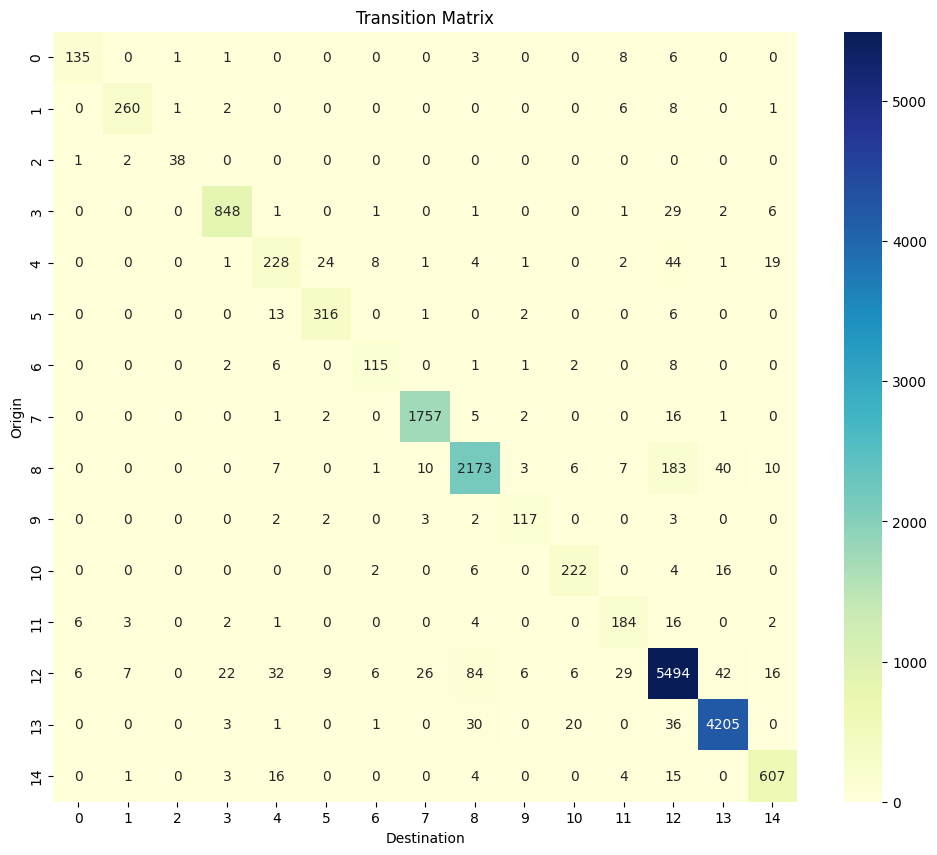

In [69]:
plot_transition_matrix(dynamic_dataset)  
plt.show

Transition matrix for each phase-transition

<function matplotlib.pyplot.show(close=None, block=None)>

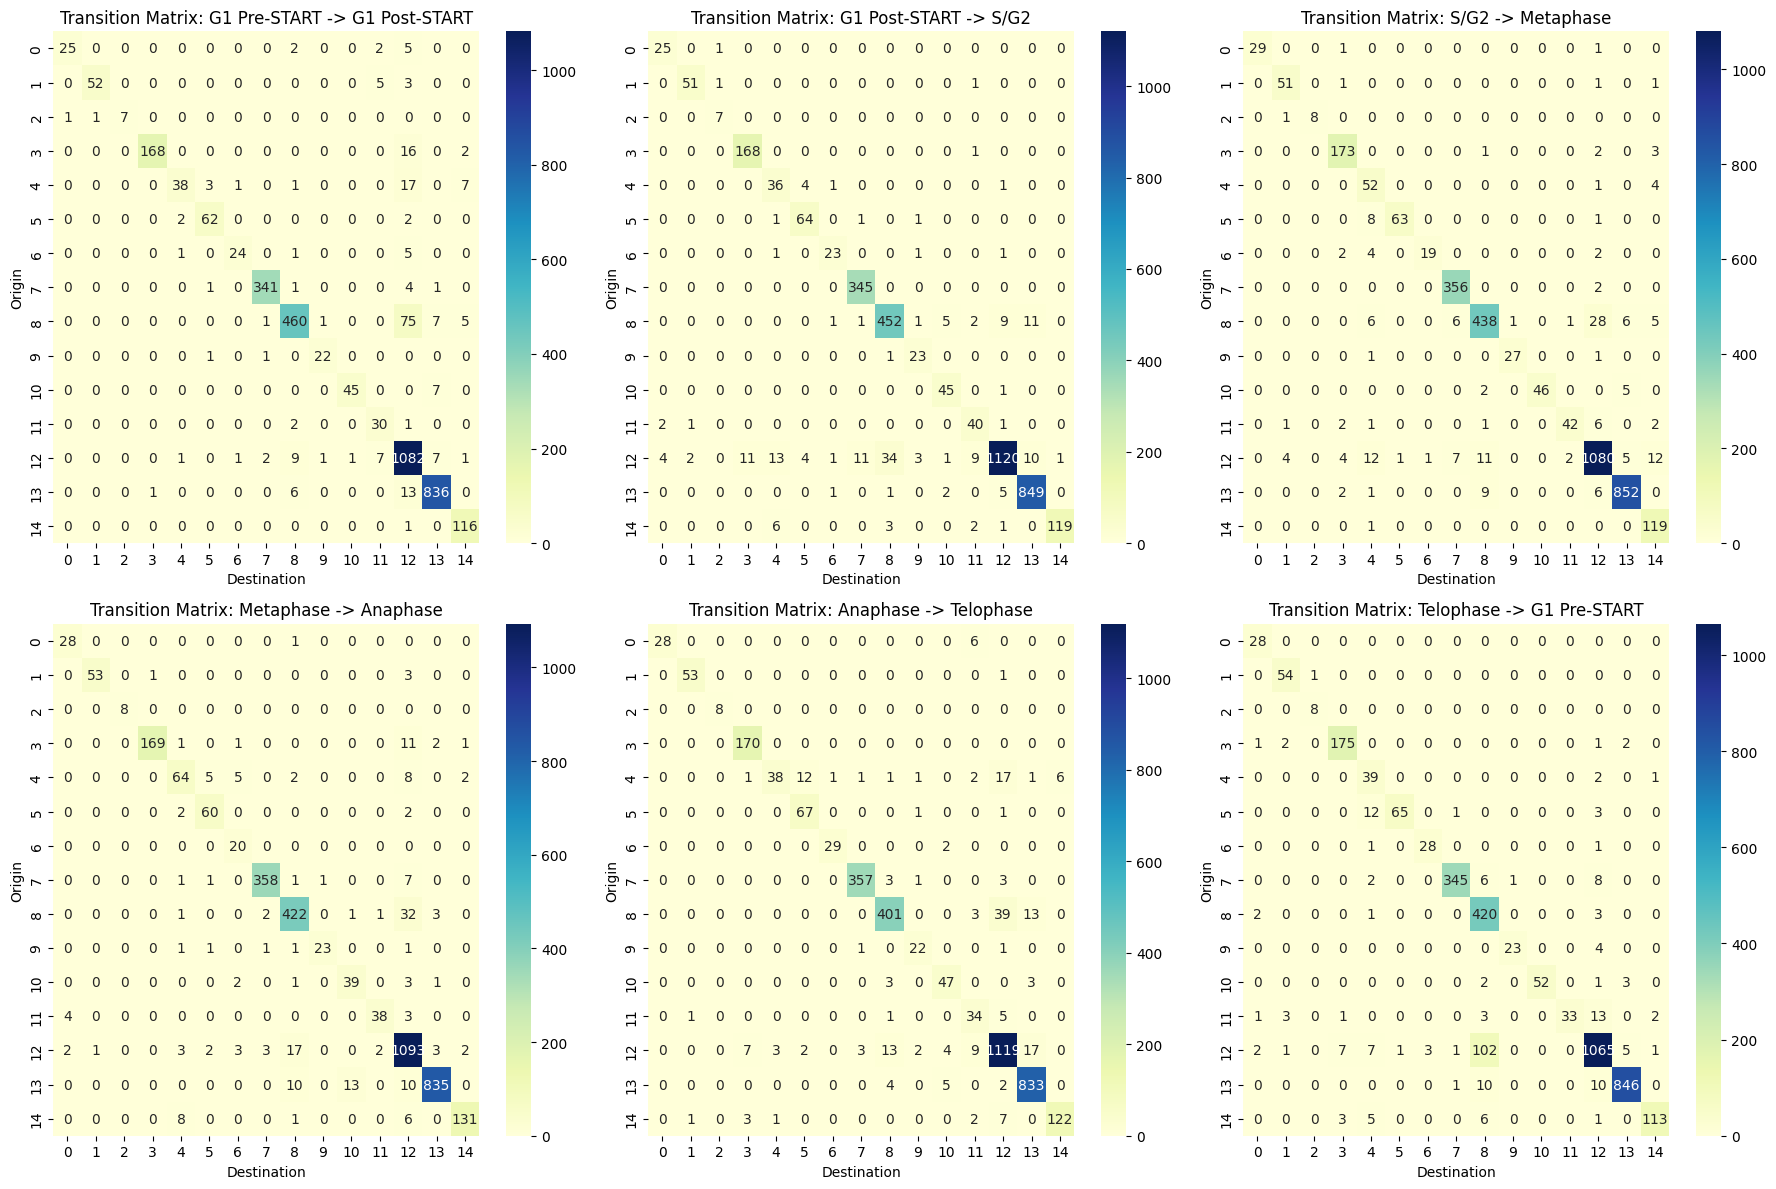

In [70]:
plot_individual_transition_matrices(dynamic_dataset) 
plt.show

Comparison between the distribution of long-sequences proteins and of all proteins among the classes

/home/emilia_farina/ml-project-2-teamrelu/utils/data_cleaning_plots.py:171: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  final_mean = final_data.groupby(axis=1, level=0).mean()


<function matplotlib.pyplot.show(close=None, block=None)>

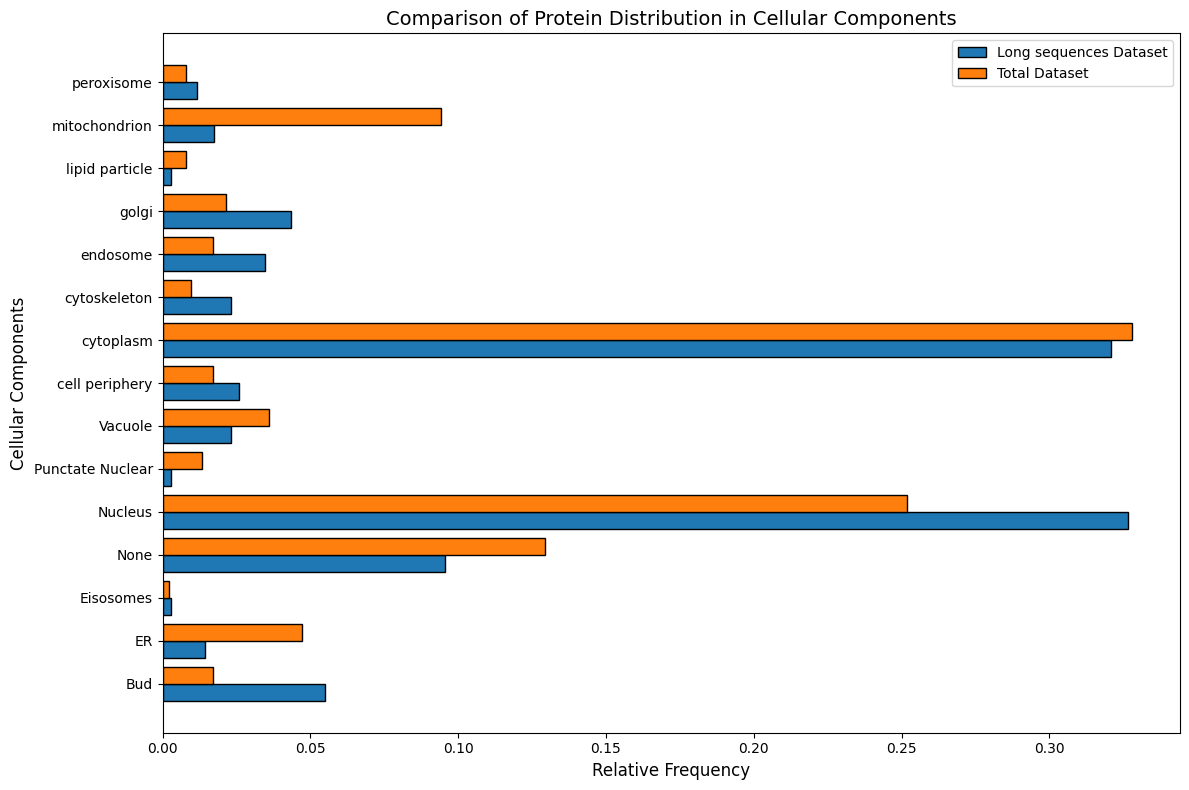

In [71]:
long_sequences_distribution(final_df_with_long) 
plt.show